In [70]:
from data_utils.open_data.open_meteo import historical,HistoricalDim
from data_utils.random_utils.basic_distributions import WeibullDistribution,NormalDistribution
from data_utils.serial_utils.series_trans_utils import MinMax, ZScore

In [66]:
import numpy
from matplotlib import pyplot as plt
eps= numpy.finfo(float).eps

In [5]:
data = historical(
    100, 40, "2024-1-1", "2024-2-1", HistoricalDim.wind_speed_100m
).hourly[HistoricalDim.wind_speed_100m]

In [7]:
wd = WeibullDistribution(1.78952, 4.14362)

In [9]:
wd.cdf(data).y

array([0.16823611, 0.28677902, 0.48778163, 0.59732586, 0.60891294,
       0.57019522, 0.71704401, 0.69625596, 0.7316863 , 0.82187317,
       0.84155088, 0.80465467, 0.67453152, 0.65801586, 0.69483662,
       0.69055368, 0.67156511, 0.6283572 , 0.74201338, 0.83793584,
       0.73817253, 0.87514258, 0.91443732, 0.94056602, 0.94822632,
       0.91388632, 0.82479085, 0.74073734, 0.6283572 , 0.50435987,
       0.46539339, 0.42939241, 0.26400115, 0.29825726, 0.33873333,
       0.40638768, 0.45220087, 0.45409098, 0.50069276, 0.51711433,
       0.52973746, 0.58047185, 0.6267575 , 0.71021958, 0.69483662,
       0.59398303, 0.43130139, 0.28296494, 0.20858157, 0.18375351,
       0.29442555, 0.50801693, 0.63787506, 0.67156511, 0.76545263,
       0.5597999 , 0.24711411, 0.14980963, 0.10314726, 0.12732637,
       0.25835128, 0.33293168, 0.52973746, 0.74073734, 0.84859648,
       0.87514258, 0.92082627, 0.91553062, 0.93421162, 0.95502977,
       0.95470877, 0.88935453, 0.7316863 , 0.52973746, 0.38324

In [14]:
numpy.random.uniform(0+eps,1-eps,len(Out[9]))

array([0.63920748, 0.69288666, 0.64406078, 0.74592675, 0.81137825,
       0.8896284 , 0.34876384, 0.2751685 , 0.97227124, 0.90091864,
       0.80641755, 0.69328253, 0.34297575, 0.59654392, 0.78088685,
       0.29031881, 0.09470578, 0.25097482, 0.00235318, 0.63823342,
       0.46140645, 0.53147461, 0.68182265, 0.66372741, 0.78628907,
       0.92298271, 0.8498569 , 0.30890609, 0.29476946, 0.94848517,
       0.40168372, 0.17160416, 0.7148744 , 0.85843074, 0.71785632,
       0.09998071, 0.6193687 , 0.96473563, 0.54561727, 0.78989497,
       0.04306555, 0.43707585, 0.20645692, 0.59686495, 0.33719063,
       0.54576299, 0.16551815, 0.97400648, 0.69607531, 0.05903635,
       0.47467679, 0.21422168, 0.48252544, 0.73585809, 0.68636963,
       0.56855733, 0.69004078, 0.57486199, 0.80361691, 0.09122743,
       0.69338726, 0.22965834, 0.87101344, 0.82653   , 0.31041034,
       0.60428434, 0.63286047, 0.63123618, 0.19085432, 0.41295766,
       0.30936892, 0.6705727 , 0.59918321, 0.07232915, 0.25734

In [57]:
from statsmodels.tsa.arima.model import ARIMA

In [62]:
model = ARIMA(wd.cdf(data).y, order=(3,0, 1))
model_fit = model.fit()
simulated_path  = model_fit.simulate(nsimulations=768)

In [74]:
zpath =  ZScore.f(simulated_path)[0]
nd = NormalDistribution(0,1)
izpath = nd.cdf(zpath).y

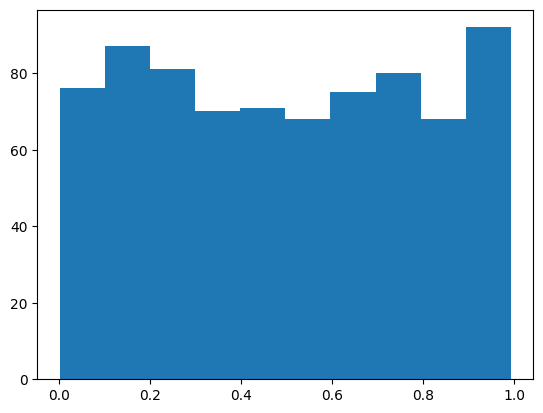

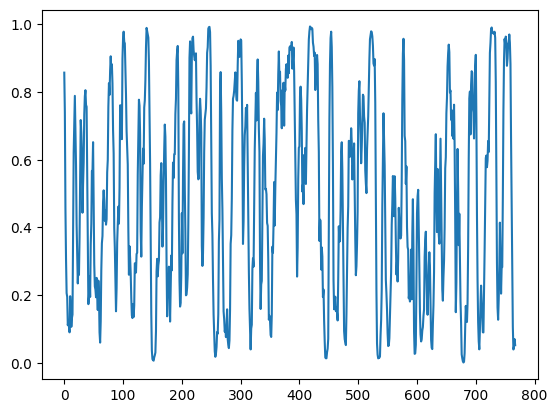

In [77]:
plt.hist(izpath)
plt.show()
plt.plot(izpath)
plt.show()

In [81]:
mm = MinMax.f(izpath, min(Out[14]), max(Out[14]))[0]

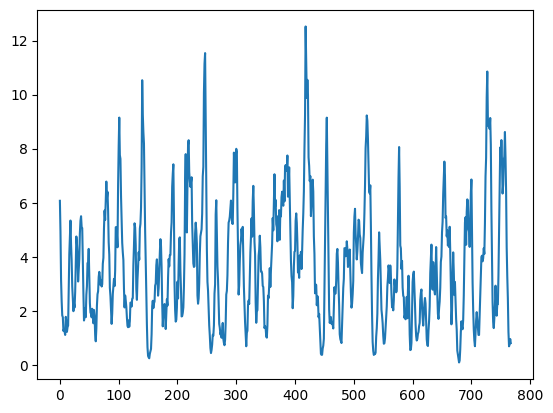

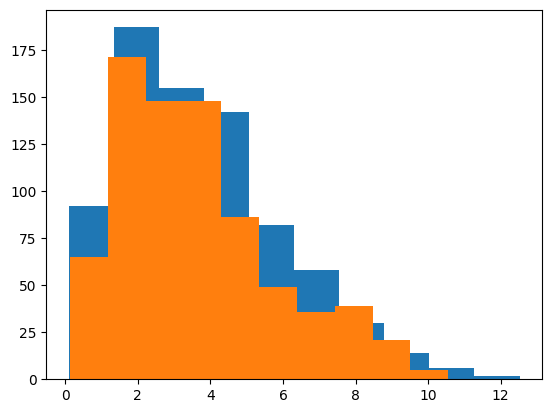

In [88]:
plt.plot(wd.ppf(mm).y)
plt.show()
plt.hist(wd.ppf(mm).y)
plt.hist(data)
plt.show()

In [86]:
wd.ppf(mm).y

array([ 6.07213643,  4.9262489 ,  3.14626307,  2.36588179,  1.83201342,
        1.76895772,  1.25886515,  1.33384341,  1.22699664,  1.11226241,
        1.7808385 ,  1.59768626,  1.22666292,  1.39653137,  1.45977483,
        2.82055345,  4.09399951,  4.71708295,  5.3425541 ,  4.45254368,
        3.86458169,  2.90452518,  2.40799653,  1.98997188,  2.27434263,
        2.12641098,  2.70710355,  3.71217597,  4.75182289,  4.48721078,
        4.07787954,  3.08729219,  3.54759787,  3.92306826,  4.87445701,
        5.33445458,  5.50179441,  5.10546611,  5.06213062,  3.77893608,
        2.6520528 ,  1.64579477,  1.77296265,  2.10822581,  1.76854865,
        2.59191114,  2.91648681,  3.77068908,  3.7570325 ,  4.29396633,
        3.31210302,  2.28877463,  1.94232604,  1.89265564,  1.76320367,
        2.0786212 ,  1.80491355,  1.54333908,  2.03467471,  1.82277104,
        1.11351222,  0.876561  ,  1.33626798,  2.19980026,  2.61600141,
        2.72637351,  3.25546931,  3.44426943,  3.27603521,  2.96

In [90]:
data2=historical(
    90, 30, "2024-1-1", "2024-2-1", HistoricalDim.wind_speed_100m
).hourly[HistoricalDim.wind_speed_100m]

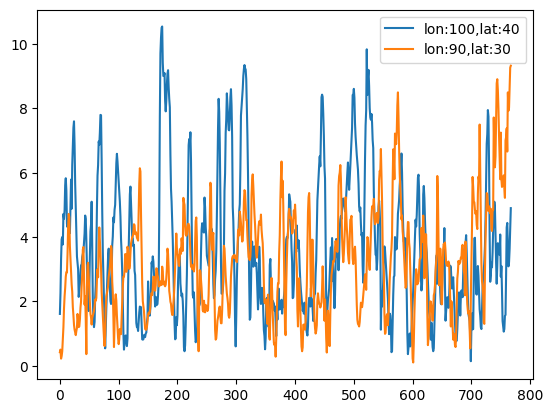

In [112]:
plt.plot(data)
plt.plot(data2)
plt.legend(['lon:100,lat:40','lon:90,lat:30'])
plt.show()

In [94]:
wd2=WeibullDistribution(2.01874, 3.60026)

In [95]:
wd2.cdf(data2).y

array([1.29870158e-02, 1.84151581e-02, 3.53720074e-03, 6.60559562e-03,
       1.49133123e-02, 5.40342972e-02, 1.03118090e-01, 2.14342645e-01,
       2.99890290e-01, 3.61393294e-01, 4.45150386e-01, 4.78323513e-01,
       4.75967419e-01, 6.04777467e-01, 7.64187393e-01, 8.22273371e-01,
       8.08797183e-01, 6.56400433e-01, 5.76600003e-01, 5.01742958e-01,
       3.87723469e-01, 3.32827928e-01, 2.22991035e-01, 1.70747586e-01,
       1.14876366e-01, 9.03373512e-02, 7.82906184e-02, 6.56558181e-02,
       8.42201562e-02, 9.82414402e-02, 1.78797453e-01, 1.38051473e-01,
       1.03118090e-01, 1.06423973e-01, 1.43633107e-01, 2.18654332e-01,
       2.63036122e-01, 3.75745034e-01, 4.61784318e-01, 6.34126980e-01,
       6.50397347e-01, 4.59413315e-01, 2.40574573e-01, 2.99890290e-01,
       1.43633107e-01, 9.53057011e-03, 3.68565182e-01, 5.24862977e-01,
       5.45367757e-01, 4.40383630e-01, 3.42323325e-01, 2.56245835e-01,
       1.78797453e-01, 1.56977085e-01, 1.16598455e-01, 1.53119816e-01,
      

In [96]:
model2 = ARIMA(wd2.cdf(data2).y, order=(3,0, 1))
model_fit2 = model2.fit()
simulated_path2  = model_fit2.simulate(nsimulations=768)

In [100]:
zpath2 =  ZScore.f(simulated_path2)[0]
izpath2 = nd.cdf(zpath2).y

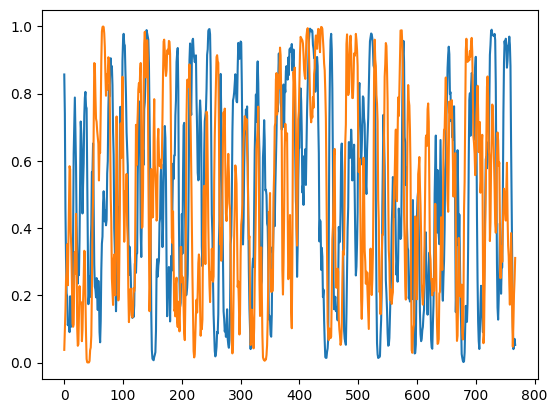

In [101]:
plt.plot(izpath)
plt.plot(izpath2)

In [102]:
def noize_f(x: float) -> float:
    return 0.274882 / (0.0892443 + abs(x)) ** 2.325384114212880

In [113]:
noize_f(0.6)

0.6531166180950513

In [116]:
noize_izpath2=MinMax.f(izpath2, 0, noize_f(0.4))[0]

In [117]:
wd2.ppf(MinMax.f(noize_izpath2 -zpath, min(Out[14]), max(Out[14]) )[0]).y

array([1.67862547, 2.0951907 , 2.74295752, 3.15094879, 3.43377884,
       3.57091423, 3.73354892, 3.83525826, 4.07721511, 4.38433289,
       3.85858236, 3.71835223, 3.90424993, 3.65289722, 3.45589106,
       2.80911786, 2.37609305, 2.33386159, 2.23667635, 2.43182088,
       2.81350247, 3.017854  , 2.96887509, 3.09559994, 2.97251302,
       3.13193304, 2.98864655, 2.57072897, 2.24559165, 2.32403697,
       2.32649841, 2.69993131, 2.63203463, 2.57733342, 2.37855096,
       2.23940812, 2.03618421, 2.02841994, 1.95715677, 2.35464511,
       2.75664895, 3.21159119, 3.14503091, 2.98971963, 3.1896122 ,
       2.82966136, 2.74399685, 2.59399156, 2.8185661 , 2.72591132,
       3.28817983, 4.01408987, 4.22068754, 4.10794218, 4.0876168 ,
       3.88210576, 4.0058305 , 4.15842255, 3.81607468, 3.78879858,
       4.46879737, 4.73164451, 4.4505106 , 4.07429134, 3.97418253,
       3.93791829, 3.69863146, 3.61874269, 3.66297012, 3.74533189,
       3.56542746, 3.58292725, 3.62768423, 3.2752305 , 3.26158